In [2]:
import numpy as np
import scipy as sp
import sympy as sm
import pandas as pd
import timeit

In [3]:
x = sm.Symbol('x')

In [4]:
df = 9*0.01*((1/6)*x**6 - (1/3)*x**3 - (1/0.05)*x**2 - 1.5*x - 1.*x**3)
Vdf = -1*sm.diff(df, x)
Vdf

-0.09*x**5 + 0.36*x**2 + 3.6*x + 0.135

In [5]:
k = np.arange(2, 5, 0.5)
xvls = np.linspace(-4, 4, 1000)

<IPython.core.display.Javascript object>


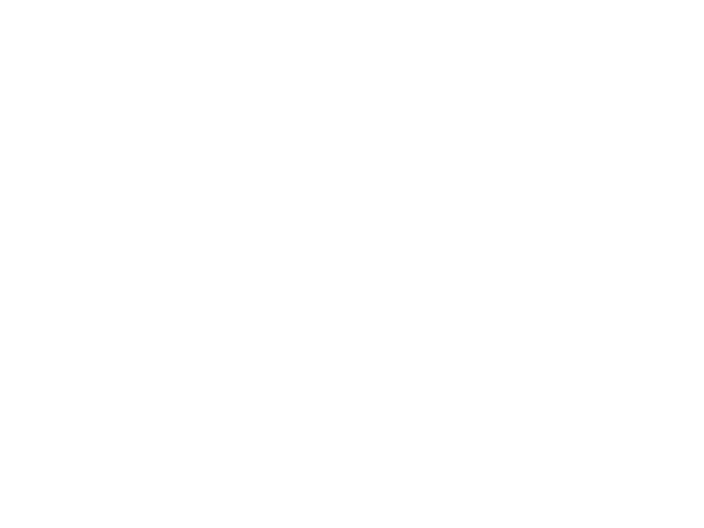

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('System dynamics',fontsize =16)

for i in np.arange(len(k)):

    y2int = k[i]*df
    y2int_fun = sm.lambdify(x, y2int)

    y1dif = -1*sm.diff(y2int, x)
    y1dif_fun = sm.lambdify(x, y1dif)

    ttl = "k=" + str(np.around(k[i], 1))

    ax1.plot(xvls,y2int_fun(xvls), label = ttl)
    ax1.set_xlabel("state variable", fontsize =12 ); ax1.set_ylabel("potential well", fontsize =12)

    ax2.plot(xvls,(y1dif_fun(xvls)), label = ttl)
    ax2.set_xlabel("state variable", fontsize =12); ax2.set_ylabel("spring value", fontsize =12)

    ax1.legend()
    ax2.legend()

In [7]:
mu, x = sm.symbols('mu x')
vdp = mu*(3.5-0.25*x**3 + 2*x)
vdp1 = sm.lambdify([mu, x], vdp)

<IPython.core.display.Javascript object>


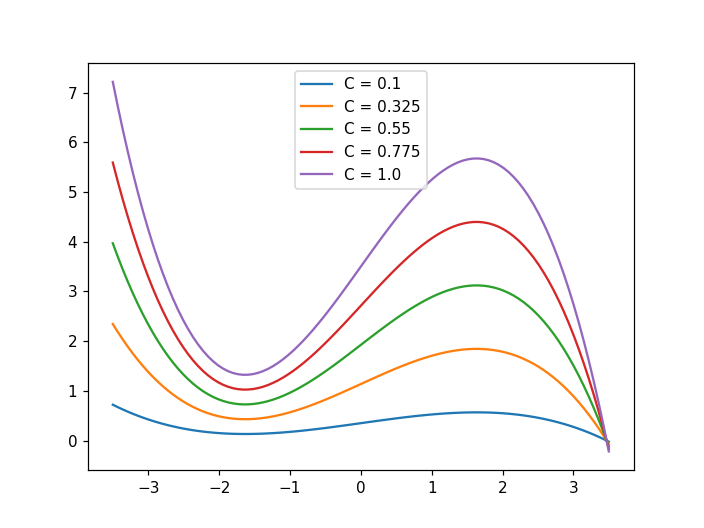

In [8]:
mu_rg = np.linspace(0.1, 1, 5)
x_rg = np.linspace(-3.5, 3.5, 100)

%matplotlib notebook
for i in np.arange(len(mu_rg)):
    vpd_vl = vdp1(mu_rg[i], x_rg)

    ttl = "C = " + str(np.around(mu_rg[i], 3))
    plt.plot(x_rg, vpd_vl, label = ttl)
    plt.legend()
    plt.show()

In [9]:
I0, k, c, F, Ac_F, r, F_p = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
c

A_c_F/(1 + exp(-r*(F - F_p))) + I0

In [10]:
c1 = c.subs({I0 : 0.25, Ac_F: 4, r : 1.2, F_p : 2.5})
c2 = sm.lambdify(F, c1, "numpy" )
c1

0.25 + 4/(1 + 20.0855369231877*exp(-1.2*F))

In [11]:
t, f0 = sm.symbols('t, f_0')
F = f0*sm.sin(t) + 1.1*f0
F

f_0*sin(t) + 1.1*f_0

In [12]:
F1 = sm.lambdify([f0, t], F, "numpy")
tm = np.linspace(0, 100, 10001)
F2=F1(10,tm)
F2

array([11.        , 11.09999833, 11.19998667, ...,  5.76490401,
        5.85036632,  5.93634359])

<IPython.core.display.Javascript object>


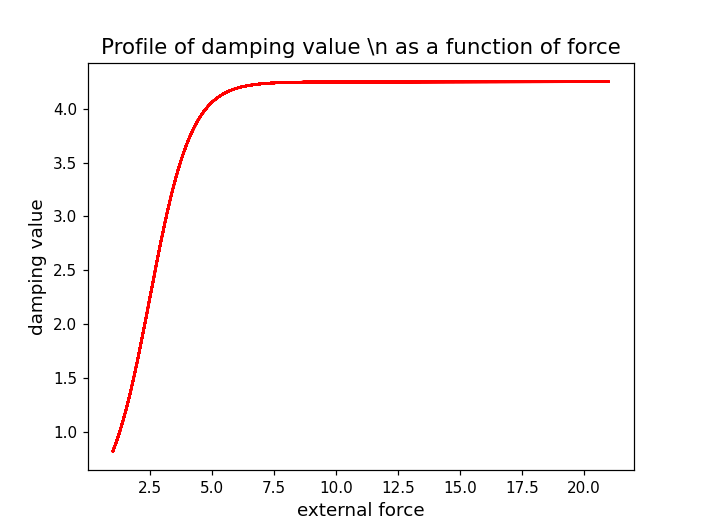

Text(0.5, 1.0, 'Profile of damping value \\n as a function of force')

In [13]:
%matplotlib notebook
plt.plot(F2, c2(F2), c = 'red'),
plt.xlabel("external force",fontsize =12); plt.ylabel("damping value", fontsize =12)
plt.title("Profile of damping value \\n as a function of force", fontsize =14)

In [14]:
I0, k, c, F, Ac_F, r, F_p  = sm.symbols('I0, k, c, F, A_c_F, r, F_p')
c = I0 + Ac_F/(1+ sm.exp(-r*(F - F_p)))
k1 = c.subs({I0 : 0.5, Ac_F: 2, r : 0.6, F_p : 0.5})
k2 = sm.lambdify(F, k1, "numpy" )

Text(0.5, 1.0, 'Profile of spring value \\n as a function of force')

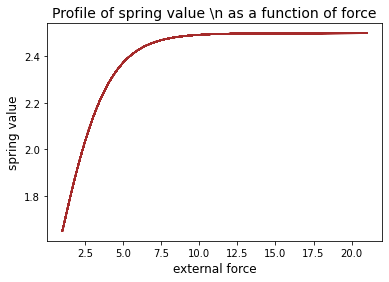

In [15]:
%matplotlib inline
plt.plot(F2, k2(F2), c = 'brown')
plt.xlabel("external force", fontsize =12); plt.ylabel("spring value", fontsize =12)
plt.title("Profile of spring value \\n as a function of force", fontsize =14)

In [16]:
def nonSDMS_nonF_fun(t, u, M, tend, t_step, F):

    from scipy.interpolate import interp1d

    x1 = u[0]
    x2 = u[1]

    xs = np.arange(len(F))
    y_interp = interp1d(xs, F)
    Frc = y_interp(t/t_step)

    # print(t)
    # print([\\Frc\\ Frc])
    ##Force dependent spring-damper##
    Ki = k2(Frc); Ci = c2(Frc) 
#     print(['Ki', Ki]); print(['Ci', Ci])
    ##Dynamic potential##

    y2int = Ki*df
    y1dif = -1*sm.diff(y2int, x)
    y1dif_fun = sm.lambdify(x, y1dif)
    spring_val = (y1dif_fun(x1))
#     print(["spring cons = ", spring_val ])

    ##Dynamic damper 
    damp_cons = Ci*0.5*(3.5-0.25*x1**3 + 2*x1)
#     print(["damper cons = ", damp_cons ])

    du = np.zeros([2, 1])

    du[0] = x2
    du[1] = (1/M)*(Frc - damp_cons*x2 + spring_val)

    du = du.reshape(2)

    return(du)

In [17]:
import random as rn
import pylab as pl

%matplotlib inline
def varying_extForce(N, Ts, ampl, mg):
    x0=pl.arange(0,N,Ts)
    sigs = np.zeros([10, len(x0)])

    phi = pl.linspace(0.001, 0.3, 100)
    amp = pl.linspace(2, 5, 100)

    for i in np.arange(10):

        amp1 = amp[rn.randint(0, 99)]
        phi1 = phi[rn.randint(0, 99)]

        y1= (amp1*pl.sin(phi1*pl.pi*x0) + mg)
        sigs[i:] = y1

    sigs1 = ampl*np.apply_along_axis(np.mean, 0, sigs)
    plt.plot(sigs1)
    return(sigs1)


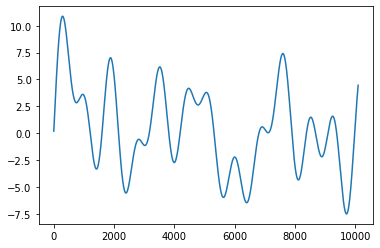

In [18]:
from scipy.integrate import solve_ivp

tend = 100
t_step = 0.01
t_span = (0, tend)
tint = np.linspace(0, tend, int(tend/t_step))
%matplotlib inline
#AMPL = np.random.sample(1)*2
extF= varying_extForce(tend+1, t_step, 4, 0.05)

In [19]:
u0=np.array([-2, 0.1])
p = (1, tend, t_step, 1*extF)
start_time = timeit.default_timer()
slLF1 = solve_ivp (nonSDMS_nonF_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

44.67826546099968


In [20]:
u0=np.array([-2, 0.1])
p = (1, tend, t_step, 2*extF)
start_time = timeit.default_timer()
slHF1 = solve_ivp (nonSDMS_nonF_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

67.27115178504027


<IPython.core.display.Javascript object>


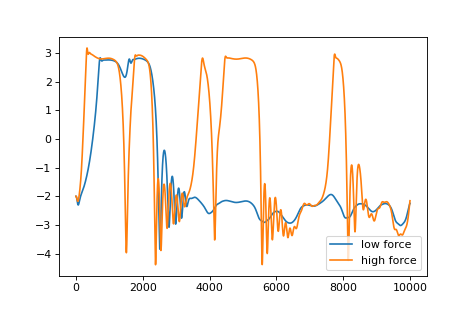

In [22]:
%matplotlib notebook
plt.plot(slLF1.y[0], label = 'low force')
plt.plot(slHF1.y[0], label = 'high force')
plt.legend()
plt.show()

In [23]:
u0=np.array([2.5, 0.1])
p = (1, tend, t_step, 1*extF)
start_time = timeit.default_timer()
slLF2 = solve_ivp (nonSDMS_nonF_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

42.83958417800022


In [28]:
u0=np.array([2.5, 0.1])
p = (1, tend, t_step, 5*extF)
start_time = timeit.default_timer()
slHF2 = solve_ivp (nonSDMS_nonF_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

83.49874603096396


<IPython.core.display.Javascript object>


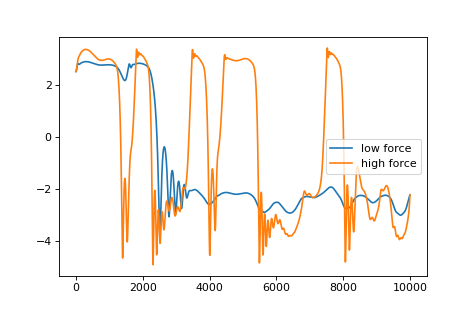

In [29]:
%matplotlib notebook
plt.plot(slLF2.y[0], label = 'low force')
plt.plot(slHF2.y[0], label = 'high force')
plt.legend()
plt.show()

In [62]:
def sdms_simu(j):

    extF= varying_extForce(tend+0.01, t_step, 4, 0.05)
    extF1 = extF[:-1]

    u0=np.array([-2, 0.1])
    p = (1, tend, t_step, 1*extF)
    start_time = timeit.default_timer()
    slLF1 = solve_ivp (nonSDMS_nonF_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)

    u0=np.array([-2, 0.1])
    p = (1, tend, t_step, 2*extF)
    start_time = timeit.default_timer()
    slHF1 = solve_ivp (nonSDMS_nonF_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)

    u0=np.array([2.5, 0.1])
    p = (1, tend, t_step, 1*extF)
    start_time = timeit.default_timer()
    slLF2 = solve_ivp (nonSDMS_nonF_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)

    u0=np.array([2.5, 0.1])
    p = (1, tend, t_step, 3*extF)
    start_time = timeit.default_timer()
    slHF2 = solve_ivp (nonSDMS_nonF_fun, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)

    id='{0:04}'.format(j)
    sdms_df = pd.DataFrame({'lowF0': slLF1.y[0], 'highF_intrm' : slHF1.y[0], 'lowF1': slLF2.y[0], 'highF_high' : slHF2.y[0],
                            'force_low': extF1, 'force_intr' :  2*extF1, 'force_high' : 3*extF1})
    fnm = "/home/karthik/jupyter_dir/SDMS/differential_force_finfo/simu_" + id + ".csv"
    sdms_df.to_csv(fnm)
    print(j)

61.27931284799706
74.17062119700131
61.17849718600337
136.36098988899903
2
62.01441018699552
93.32494224200491
79.09889359099907
116.81909779900161
9
75.89329947700026
106.98760895901069
98.84279696500744
107.17326178299845
16
52.87531649399898
83.56488015399373
67.97748735400091
81.7861477569968
22
41.838225466999575
67.02778156899149
52.37224443399464
75.4076067529968
27
89.42578995699296
123.52371481299633
65.51233492999745
88.33978345899959
32
39.78844709000259
69.77782105500228
66.37092243600637
111.08971676998772
39
72.03694444400026
119.21414072600601
74.08628252999915
105.48665900599735
43
64.20440361600777
75.77586106600938
63.41752608200477
82.28158770200389
50
55.651332535999245
76.88354012000491
54.71388037300494
92.56591837000451
54
64.9451087829948
118.85901577500044
79.16883393400349
129.1471716399974
59
87.83502587099792
112.24313966000045
54.44814230799966
89.85551899700658
66
52.05675138000515
80.45598677999806
63.23269448899373
89.34785505100444
72
40.653990455990424

/home/karthik/jupyter_dir/jupyter_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


66.91721093200613
110.08456485399802
64.82755888599786
79.06474399501167
1
50.960194052997394
70.29501790100767
51.65129044900823
81.27494935800496
7
34.111893747001886
56.94161462999182
46.72170736199769
59.920975029002875
13
49.00150990400289
61.409481084003346
48.94389890800812
108.82023801300966
18
85.00025122000079
104.05105735600227
77.35106522600108
131.4668404480035
21
93.03811470499204
122.85150584699295
80.99018912400061
144.4588617219997
29
85.6676743709977
106.11858635400131
67.01278396999987
135.44157165900106
37
78.28899913700297
91.975891331007
56.122230933004175
114.60622559499461
45
79.98769239100511
105.03796511499968
78.42795461100468
124.88651106400357
49
64.0166230850009
111.26323571399553
68.60678087300039
83.94176971500565
57
59.99231475099805
92.80721339900629
58.53961757500656
99.66135856999608
63
78.66647613700479
111.05567424000765
82.88341956901422
135.8007656980044
69
83.81370024399075
136.3589409210108
94.85373580700252
160.7455768080108
75
74.257049514999

91.88026587200875
115.36212878300285
52.11409201800416
91.55177390101016
116
47.740149492005
84.18342900399875
86.31153685999743
117.77589405600156
122
85.19167918800667
133.14474805600184
85.93646820800495
150.28481077498873
129
44.81561116800003
71.05602296900179
48.16356136401009
81.54753172899655
137
38.6504536660068
62.50864172400907
50.43234280400793
66.71113273299125
143
53.032046741005615
77.4670780650049
64.40847431900329
145.72808062200784
145
58.69780414500565
75.17143537898664
65.43807516500237
96.16374802599603
151
74.46912358800182
120.3642512140068
80.53165054800047
135.64877900200372
156
76.66844110700185
117.83898619399406
102.75339070300106
140.69080841100367
165
53.20760732299823
84.89133430601214
67.07882050398621
100.48547185899224
172
88.81294378500024
111.0734752950084
87.68141940700298
114.96244807601033
178
52.47249464401102
88.42805932600459
78.38562861000537
97.69388140299998
184
88.87727561699285
119.15803433700057
85.04142370499903
135.35725129999628
190
61

47.545325289000175
80.5074185449921
56.727042102007545
82.45595760499418
244
48.61178816600295
80.55654401698848
47.82203837700945
90.63645226300287
247
49.964946294989204
109.87923516100273
60.89928726799553
124.22278000199003
253
97.71557185599522
78.92331238400948
76.6114426139975
93.59863035399758
259
47.43727349999244
96.02648825000506
92.8888403079909
125.26859173600678
265
92.26656715400168
103.83063474799565
88.75280596199445
123.18583787200623
271
62.26556129999517
56.02880531799747
54.34470836799301
70.8259655770089
278
51.663422722005635
77.47276745199633
60.989571821002755
84.60299900900282
282
41.051572561002104
66.64040472899796
52.21697237199987
67.18271419100347
288
44.258384733999264
76.66694468499918
85.88630021399877
109.60610604200338
292
82.0000608410046
124.2427481180057
90.41743259699433
132.52034454001114
297
55.7640045619919
112.16965389800316
73.22481527099444
129.79793444600364
306
80.22399455000414
111.21687334300077
106.9411797389912
135.86297816599836
312


52.13690338299784
70.66641425399575
51.18921505600156
81.4883130149974
389
56.939473234000616
64.3253001030098
56.39582353900187
77.40807821399358
393
38.96871806199488
64.33159747500031
47.32591626899375
71.87580155000614
396
45.29878050100524
72.4959147490008
59.15691772098944
76.23075844200503
400
41.99302729299234
66.28057573799742
48.33567492899601
81.28178771800594
405
42.66282776999287
67.6410014849971
52.458182632006356
70.57950359900133
409
55.18686331900244
73.98823076099507
55.421662340988405
91.93417511999724
414
42.7038042589993
76.28209228700143
45.975393341999734
81.49157189400285
418
48.74207913900318
70.66048367199255
48.0203222919954
82.13642983000318
424
43.25121709400264
64.92171986300673
56.68928996800969
76.60481254900515
427
38.06314485499752
62.83000559499487
46.3969001390069
69.80832502299745
431
38.80042644000787
68.10322496699519
48.67045987599704
72.26669303799281
435
47.49576259301102
65.81023664399981
56.787594989989884
82.5398872900114
439
35.389153647003

50.23369885800639
67.11672284500673
50.93909470400831
88.93212832900463
483
47.52712775800319
72.27897571799986
48.19500104300096
89.92335677899246
489
45.634414638989256
58.21600779899745
45.620073475001846
68.43021153801237
494
47.01516928800265
68.00010760400619
63.467914355001994
84.25742565900146
497
43.77601436099212
69.09902037600114
59.89574728200387
84.39870738700847
502
44.47702945099445
64.69886161500472
51.249611968989484
77.93428414200025
506
44.59743756499665
66.34599354400416
55.980304990007426
73.7710225010087
511
46.39932776999194
77.27405935399293
50.21981952799251
86.07896313599485
516
38.73641920200316
58.164404741997714
48.22851874900516
63.669085760004236
520
52.33988748700358
70.31357386200398
51.120917570995516
78.7982511040027
524
43.42903999998816
67.6987612570083
49.94499804500083
82.06035685401002
529
50.66829540299659
72.02355839399388
59.586475931006134
77.76770096500695
533
62.925250372005394
83.07112263199815
62.18719185900409
95.52328656699683
538
47.17

74.9371544799942
103.94912678800756
98.46143251399917
100.96925613899657
597
58.75141612900188
63.7268558099895
58.94156149899936
86.63190652200137
604
51.073191675008275
66.25736036799208
50.36042099099723
89.60730327600322
608
45.65535073900537
74.39431544300169
57.88582553899323
85.61313939200772
614
51.165950278998935
64.93489529500948
51.1904542419943
78.45925468200585
618
67.94843344099354
96.38209887199628
82.55078830200364
115.58790797200345
622
66.61610762198688
111.19895799299411
76.06573014199967
117.20677299200906
628
110.80492332200811
126.97874793299707
110.90354363400547
165.61401283599844
634
98.79957605499658
126.88314523900044
96.0185073959874
148.2829758720036
643
57.48171251299209
90.20515246399736
69.04813846900652
102.73078005001298
651
95.95801331300754
139.45375395299925
92.86361691600177
158.85166270499758
658
70.26120966101007
112.02188235700305
90.32145596199553
129.06968936401245
668
38.92922563100001
53.872578991999035
43.98732644600386
58.082887421012856
6

75.56888563500252
120.62198378899484
96.23700677600573
136.11470666898822
704
41.39686873900064
68.31897252300405
52.55653886598884
76.6472333129932
712
50.36385264300043
60.90472820099967
50.192124950001016
69.91278942700592
717
44.064101071999175
57.352594216004945
42.96171932198922
69.40000382100698
720
41.066827754009864
66.76707833699766
51.53414958198846
76.47848714700376
726
39.360521683993284
69.3542196979979
80.33426484999654
117.53644842399808
730
74.34795050400135
106.30624708499818
100.52642185200239
136.00201171200024
734
77.61437594800373
94.72439142699295
76.57541485299589
112.5110229330021
742
62.98172019100457
101.09338245799881
85.27678702199773
116.96012731399969
750
80.89595765300328
116.65522461700311
76.70602427399717
126.00151159599773
756
70.86566696899536
109.04629055099213
85.41640044600354
124.17925781900703
763
77.19910223799525
121.4623454859975
82.18676875099482
145.2326575150073
771
60.678889631992206
87.96539511300216
75.12630378000904
109.36601615100517

39.1231996800052
63.35364951301017
44.82732378700166
71.28315401100554
864
42.24559142999351
62.173291950981366
53.787489932990866
69.9569706680195
868
39.09698299400043
54.06894966500113
50.24357977998443
62.86243928299518
872
39.866937523009256
61.897161995992064
48.336035037005786
71.40352902500308
876
46.11634870900889
68.56456427500234
55.578151996975066
82.72573625401128
880
66.05885620001936
73.85430751601234
49.9406844190089
87.34515477900277
886
48.96521492899046
72.28945692098932
51.072929139016196
85.75061330699828
890
45.83112592500402
75.93820060399594
55.52040171902627
81.96058595497743
894
47.31547983697965
68.51436555100372
54.437277973018354
82.90389030601364
900
51.65655801599496
69.2195881009975
49.83043868999812
73.70737532002386
903
59.64483237199602
75.96153042200604
48.890668280015234
88.79217447101837
909
48.44718436701805
76.11669176598662
60.75322529202094
86.2152964619745
913
47.474170523986686
64.7891595030087
44.77465169702191
77.34538940701168
918
42.20962

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

83.15209468299872
121.31850634500734
82.497686237999
145.20222500301315
889
64.7306211440009
101.70539869600907
79.66451310901903
122.51266081098584
897
74.57715176400961
113.45306267097476
73.43670953001129
136.90058279701043
904
73.36686527298298
123.57435646900558
82.52510848199017
139.5525040400098
912
85.67454817899852
127.34583218500484
85.32185439500608
144.24837052298244
919
67.43120020400966
114.62501211900963
86.07207937599742
130.43919106500107
927
70.04972801700933
115.05871480799397
78.83961706599803
124.07198946399149
934
73.54456813499564
105.90352580201579
88.4267672879796
116.18157050199807
942
83.93480114199338
120.43192409098265
81.66111525299493
144.5138087119849
948
76.3779677359853
102.78548876600689
77.39098284899956
133.0556537870143
956
91.60095706599532
132.96820134299924
91.04082648397889
143.65198788201087
963
63.096117050998146
108.34383550100029
78.97614032300771
117.22041946399258
972
96.93129857900203
96.83099417798803
96.69915659702383
134.1617911050270

In [67]:
import os
fls1 = os.listdir('differential_force_finfo/')
fls = list(filter(lambda f:f.endswith('.csv'), fls1))
len(fls)

1000

In [74]:
import import_ipynb
%run /home/karthik/jupyter_dir/trophic_temp/trophic_temp/IRI_calc.ipynb

In [80]:
rrts =np.zeros([1,8])

for i in np.arange(len(fls)):
    
    df1 = pd.read_csv('differential_force_finfo/' + fls[i])
    df1=df1.rename(columns = {'Unnamed: 0':'id'})
    df = df1.iloc[500:]
    
    rtts1 = resilience_calc_func(np.array(df.lowF0))
    rtts2 = resilience_calc_func(np.array(df.highF_intrm))

    rtts3 = resilience_calc_func(np.array(df.lowF1))
    rtts4 = resilience_calc_func(np.array(df.highF_high))


    rrts0_low = np.hstack((['lowF0'], rtts1))
    rrts0_high = np.hstack((['highF0_intrm'], rtts2))

    rrts1_low = np.hstack((['lowF1'], rtts3))
    rrts1_high = np.hstack((['highF1_high'], rtts4))

    rrts0 = np.vstack((rrts0_low, rrts0_high, rrts1_low, rrts1_high))
    rrts = np.vstack((rrts, rrts0))

    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [81]:
rrts1 = rrts[1:,:]

rrts_df =pd.DataFrame(rrts1)
rrts_df.columns = ['adptive', 'mn_Rg', 'mn_Rr', 'mn_Rt', 'RI', 'sd_Rg', 'sd_Rr', 'sd_Rt']
rrts_df

,adptive,mn_Rg,mn_Rr,mn_Rt,RI,sd_Rg,sd_Rr,sd_Rt
0,lowF0,0.0012348733875485352,0.26362202090023906,692.6153846153846,0.4642857142857143,0.0005268933076765102,0.19683544513408602,1006.7947264968042
1,highF0_intrm,0.009334426016944971,2.9561522331251204,336.0740740740741,0.9464285714285714,0.009208585813679051,1.1830491940220842,1239.2103198147013
2,lowF1,0.005549682534588448,2.898906592712475,450.6,0.9761904761904762,0.007930068430351777,1.0248233371676565,1379.4431267725395
3,highF1_high,0.011675351744799164,3.378670897038763,318.57142857142856,0.8448275862068966,0.010772766437582298,0.8168576826665194,1425.6305228757913
4,lowF0,0.0009130629752272467,0.26551076654025557,583.125,0.59375,0.0006377109791492785,0.2123151768051289,1630.4992333638186
...,...,...,...,...,...,...,...,...
3995,highF1_high,0.009029485638903914,2.56356864490581,367.5217391304348,0.8541666666666666,0.009474689001004925,0.6592612775462221,1432.874304070856
3996,lowF0,0.0057659460012939555,2.1164317181560315,408.3181818181818,0.8913043478260869,0.00696548107654748,1.0959307263682412,1283.28388719097
3997,highF0_intrm,0.00809884762580132,2.699902617371326,340.2962962962963,0.8928571428571429,0.01006580290418226,0.719454172352269,1253.2310482734829
3998,lowF1,0.005318816472409955,2.5089382604823296,386.7916666666667,0.9375,0.0059826166428454735,0.5854228126009331,1382.8571720656234


In [82]:
rrts_df.to_csv('/home/karthik/jupyter_dir/SDMS/diff_force_RI.csv')

## Gradient force relationship ##